In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load data (assuming you have it in a CSV or DataFrame already)
data = pd.read_csv('diabetes.csv')  # Update with actual file path if needed

# Replace zeros with np.nan in specific columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for any NaN values in the train/test splits
print("Check for NaN values in X_train and X_test:")
print("X_train contains NaN:", X_train.isna().sum().sum())
print("X_test contains NaN:", X_test.isna().sum().sum())

# If there are any NaN values in the train/test data, impute them again
if X_train.isna().sum().sum() > 0:
    print("NaN values found in X_train, applying imputation...")
    X_train = pd.DataFrame(imputer.transform(X_train), columns=X.columns)

if X_test.isna().sum().sum() > 0:
    print("NaN values found in X_test, applying imputation...")
    X_test = pd.DataFrame(imputer.transform(X_test), columns=X.columns)

# Ensure there are no NaN values after the imputation
print("After imputation, check for NaN values again:")
print("X_train contains NaN:", X_train.isna().sum().sum())
print("X_test contains NaN:", X_test.isna().sum().sum())



Check for NaN values in X_train and X_test:
X_train contains NaN: 0
X_test contains NaN: 0
After imputation, check for NaN values again:
X_train contains NaN: 0
X_test contains NaN: 0


In [21]:
print(data.head())
print(data.shape)
print(data.describe())
print(data.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.

<Axes: >

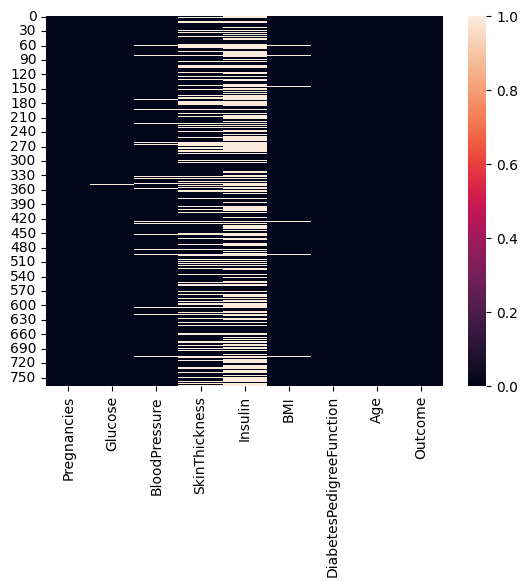

In [22]:
sns.heatmap(data.isnull())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128135       0.214178       0.100239   
Glucose                      0.128135  1.000000       0.223192       0.228043   
BloodPressure                0.214178  0.223192       1.000000       0.226839   
SkinThickness                0.100239  0.228043       0.226839       1.000000   
Insulin                      0.082171  0.581186       0.098272       0.184888   
BMI                          0.021719  0.232771       0.289230       0.648214   
DiabetesPedigreeFunction    -0.033523  0.137246      -0.002805       0.115016   
Age                          0.544341  0.267136       0.330107       0.166816   
Outcome                      0.221898  0.494650       0.170589       0.259491   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.082171  0.021719                 -0.033523   
Glucose                   0.581186  0.232

<Axes: >

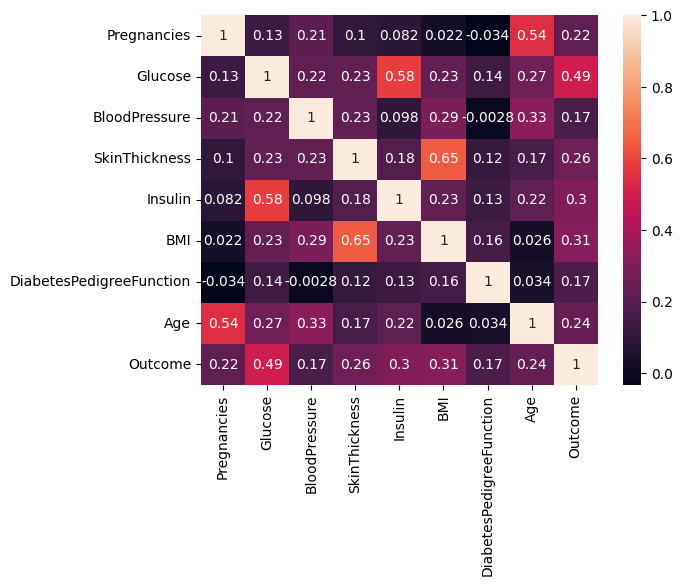

In [23]:
print(data.corr())
sns.heatmap(data.corr(),annot=True)

<Axes: >

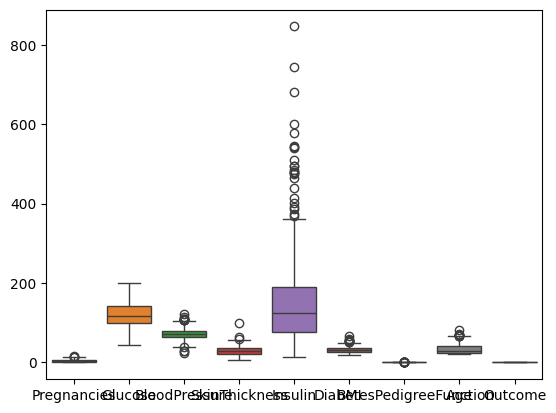

In [24]:
sns.boxplot(data)

In [42]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

data.to_csv('diabetes_new', index=False)


In [26]:
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,StackingClassifier
from sklearn.metrics import accuracy_score, classification_report



In [27]:
from sklearn.model_selection import train_test_split

X = data.drop("Outcome", axis=1)
X = data.drop("SkinThickness", axis=1)
X = data.drop( "DiabetesPedigreeFunction",axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data (assuming 'diabetes.csv' is in your working directory)
data = pd.read_csv('diabetes.csv')

# Replace zeros with NaN in specific columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7143

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.58      0.67      0.62        54

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.73      0.71      0.72       154


Confusion Matrix:
[[74 26]
 [18 36]]


In [30]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7012987012987013
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       100
           1       0.57      0.59      0.58        54

    accuracy                           0.70       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.70      0.70       154



In [31]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       100
           1       0.61      0.76      0.68        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.75      0.75       154



In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune (adjusting the max_features to valid values)
param_dist = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # 'auto' removed, kept valid options
}

# Set up RandomizedSearchCV with parallelization
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Best hyperparameters from RandomizedSearchCV
print("Best hyperparameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}


In [33]:
# Get the best model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print the classification report
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       100
           1       0.61      0.65      0.63        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.73      0.74       154



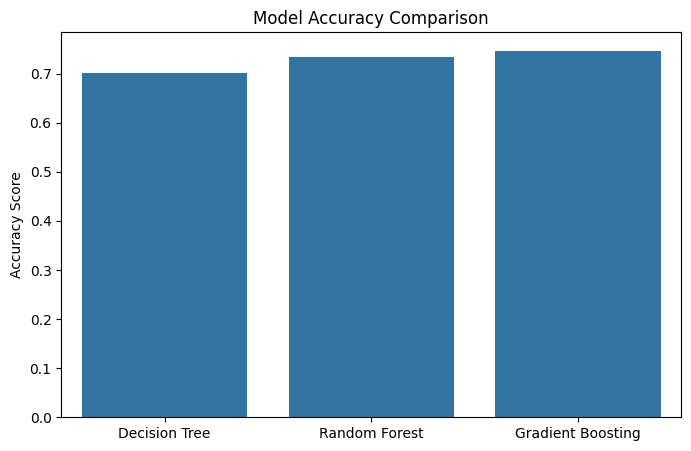

In [34]:
# Store accuracy scores
accuracy_scores = {
   # "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),
}

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()


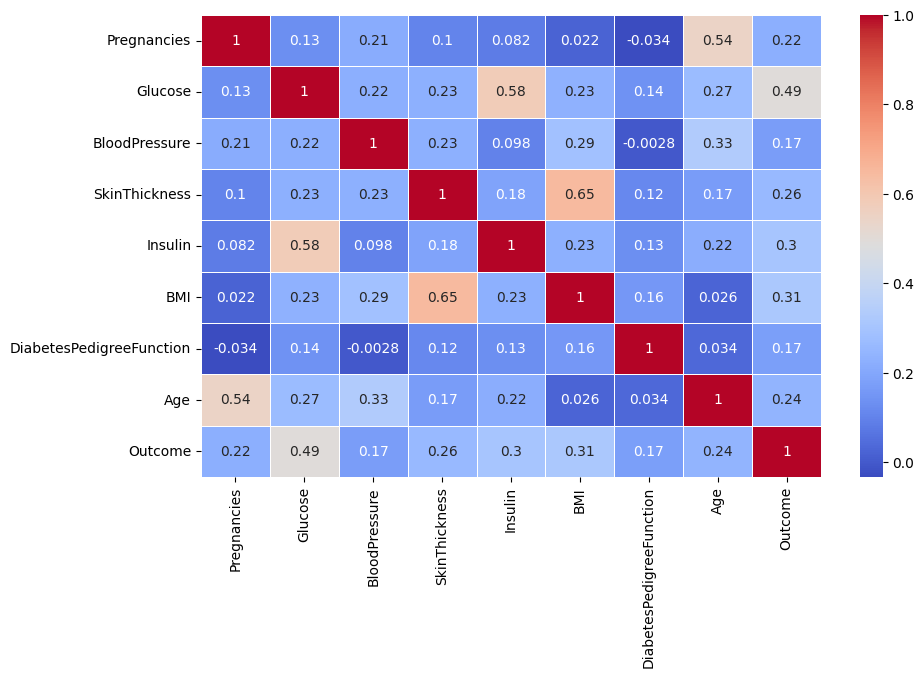

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()


In [36]:
print("Train set class distribution:", np.bincount(y_train))
print("Test set class distribution:", np.bincount(y_test))


Train set class distribution: [400 400]
Test set class distribution: [100  54]


In [37]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),  # Random Forest
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),  # Decision Tree
    ('log', LogisticRegression())  # Logistic Regression
]

meta_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True)

In [38]:
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       random_state=42)),
                               ('log', LogisticRegression())],
                   final_estimator=GradientBoostingClassifier(random_state=42),
                   passthrough=True)

In [39]:
y_pred = stacking_model.predict(X_test)

print("Stacked Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Stacked Model Accuracy: 0.6818181818181818
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       100
           1       0.55      0.54      0.54        54

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



Random Forest Accuracy: 0.73
Decision Tree Accuracy: 0.72
Logistic Regression Accuracy: 0.71
Stacked Model Accuracy: 0.68


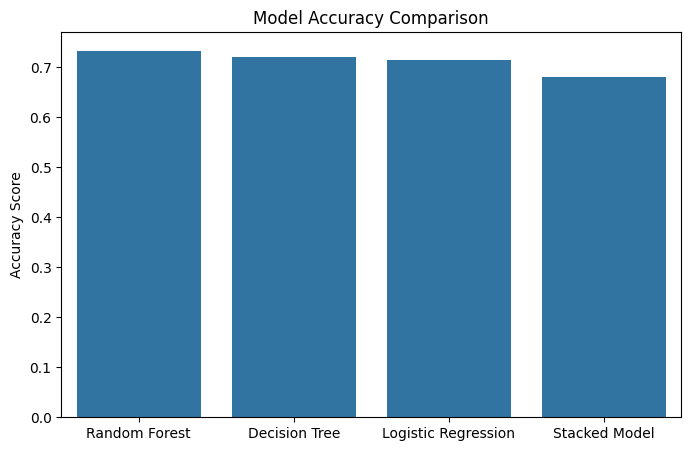

In [40]:
#Train and evaluate individual models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "Stacked Model": stacking_model
}

accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train on resampled data
stacking_model.fit(X_train_resampled, y_train_resampled)

# Test on original X_test
y_pred_synthetic = stacking_model.predict(X_test)
print("Accuracy on Synthetic Unseen Data:", accuracy_score(y_test, y_pred_synthetic))


Accuracy on Synthetic Unseen Data: 0.6818181818181818


In [45]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.7532467532467533


In [46]:
from sklearn.model_selection import GridSearchCV

# SVM with Hyperparameter Tuning
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5)
svm_grid.fit(X_train, y_train)
y_pred_svm_tuned = svm_grid.predict(X_test)
print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred_svm_tuned))
print("Best SVM parameters:", svm_grid.best_params_)

Tuned SVM Accuracy: 0.7532467532467533
Best SVM parameters: {'C': 0.1, 'kernel': 'linear'}


In [47]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.7402597402597403


In [48]:
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)
y_pred_knn_tuned = knn_grid.predict(X_test)
print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred_knn_tuned))
print("Best KNN parameters:", knn_grid.best_params_)

Tuned KNN Accuracy: 0.7077922077922078
Best KNN parameters: {'n_neighbors': 7, 'weights': 'uniform'}


In [49]:
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('log', LogisticRegression()),
    ('svm', SVC(C=svm_grid.best_params_['C'], kernel=svm_grid.best_params_['kernel'], random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=knn_grid.best_params_['n_neighbors'], weights=knn_grid.best_params_['weights']))
]

# Define meta-learner
meta_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Create stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True)

# Train and evaluate
stacking_model.fit(X_train, y_train)
y_pred_stacked = stacking_model.predict(X_test)
print("Stacked Model Accuracy:", accuracy_score(y_test, y_pred_stacked))
print(classification_report(y_test, y_pred_stacked))

Stacked Model Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



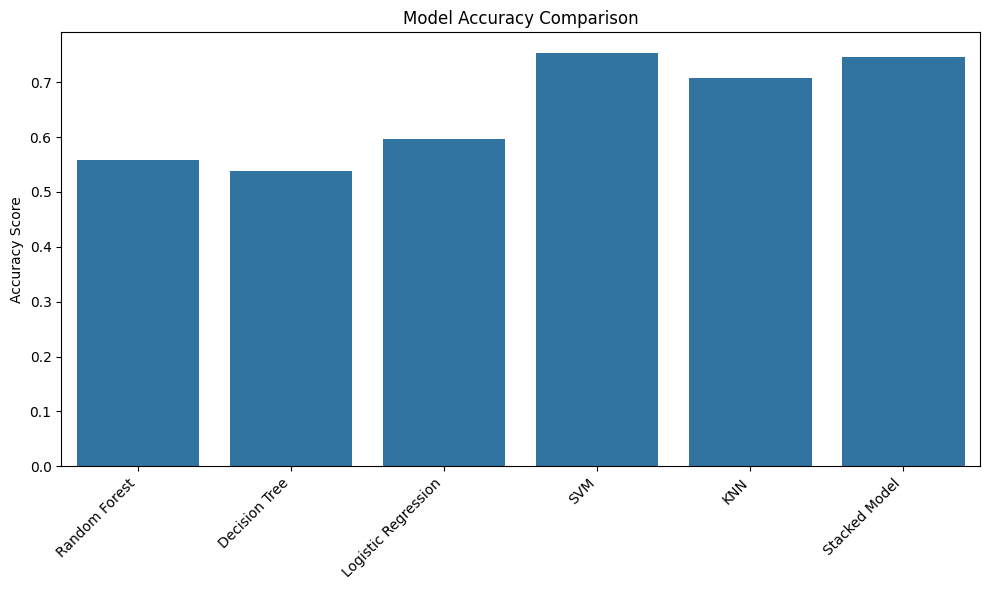

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store accuracy scores in a dictionary
accuracy_scores = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "SVM": accuracy_score(y_test, y_pred_svm_tuned),
    "KNN": accuracy_score(y_test, y_pred_knn_tuned),
    "Stacked Model": accuracy_score(y_test, y_pred_stacked)
}

# Create a histogram plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [52]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Generate synthetic data based on your training data
X_train_synthetic, y_train_synthetic = smote.fit_resample(X_train, y_train)

In [53]:
# A) Train on original data: Use your existing 'stacking_model'
# B) Train on synthetic data:
stacking_model_synthetic = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True)
stacking_model_synthetic.fit(X_train_synthetic, y_train_synthetic)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       random_state=42)),
                               ('log', LogisticRegression()),
                               ('svm',
                                SVC(C=0.1, kernel='linear', random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=7))],
                   final_estimator=GradientBoostingClassifier(random_state=42),
                   passthrough=True)

In [54]:
# A) If using the original model:
y_pred_synthetic = stacking_model.predict(X_train_synthetic)
# B) If using the model trained on synthetic data:
y_pred_synthetic = stacking_model_synthetic.predict(X_train_synthetic)

# Calculate accuracy
accuracy_synthetic = accuracy_score(y_train_synthetic, y_pred_synthetic)
print("Stacked Model Accuracy on Synthetic Data:", accuracy_synthetic)

Stacked Model Accuracy on Synthetic Data: 0.9875311720698254
